In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#Model that will later be evaluated must be first trained, we can't just train all the model at one time and then evaluate it all
#this might lead to model colapse
# Parameters
learning_rate = 0.001
training_epochs = 130
batch_size = 128    # the batch size can not exceed the size of the data.

In [2]:
#load the data matrics
matrix_1st=np.loadtxt('matrix81.txt')
print('1 state scenario matrics has the shape:',matrix_1st.shape)
matrix_2st=np.loadtxt('matrix82.txt')
print('2 state scenario matrics has the shape:',matrix_2st.shape)
matrix_3st=np.loadtxt('matrix83.txt')
print('3 state scenario matrics has the shape:',matrix_3st.shape)
matrix_4st=np.loadtxt('matrix84.txt')
print('4 state scenario matrics has the shape:',matrix_4st.shape)
test1 = np.unique(matrix_1st,axis =0)
print(test1.shape)
test2 = np.unique(matrix_2st,axis =0)
print(test2.shape)
test3 = np.unique(matrix_3st,axis =0)
print(test3.shape)
test4 = np.unique(matrix_4st,axis =0)
print(test4.shape)

from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(test1)
test1 = scaler1.transform(test1)

scaler2 = MinMaxScaler()
scaler2.fit(test2)
test2 = scaler2.transform(test2)

scaler3 = MinMaxScaler()
scaler3.fit(test3)
test3 = scaler3.transform(test3)

scaler4 = MinMaxScaler()
scaler4.fit(test4)
test4 = scaler4.transform(test4)
test1

1 state scenario matrics has the shape: (5943, 7)
2 state scenario matrics has the shape: (5867, 14)
3 state scenario matrics has the shape: (5825, 21)
4 state scenario matrics has the shape: (5783, 28)
(220, 7)
(760, 14)
(1083, 21)
(1501, 28)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.        , 0.        , ..., 0.        , 0.2       ,
        0.16666667],
       ...,
       [1.        , 0.75      , 1.        , ..., 0.83333333, 0.2       ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.66666667, 0.4       ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.83333333, 0.2       ,
        0.        ]])

## Evaluation für die test data using straight driving data

![straight](..\Masterarbeit\pic\geradeausfahrt.jpg)

## the evaluation criterion

The testing set has both Known and unknown transactions in it. The Autoencoder will learn to identify the pattern of the input data. If an anomalous test point does not match the learned pattern, the autoencoder will likely have a high error rate in reconstructing this data, indicating anomalous data. So that we can identify the anomalies of the data. To calculate the error, it uses Mean Squared Error(MSE)

# 1 state scenario

In [3]:
tf.reset_default_graph()
with tf.Session() as sess1:
    model_1st = tf.train.import_meta_graph('../Masterarbeit/model_1st/model_1st.meta')
    model_1st.restore(sess1, '../Masterarbeit/model_1st/model_1st')

    y_pred = tf.get_collection('pred_network')[0]
    X = tf.get_collection('AE_input')[0]

    encoder_decoder1st = sess1.run(y_pred, feed_dict={X: test1})
    error1st = sess1.run(tf.reduce_mean(tf.pow(test1 - encoder_decoder1st,2)))
    error_mse_1st = sess1.run(tf.pow(test1 - encoder_decoder1st,2))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ../Masterarbeit/model_1st/model_1st


In [6]:
summary_writer = tf.summary.FileWriter('./log/', sess1.graph)

## Visualization and compare for the 20 random data

c:\users\alienware\anaconda3\envs\itiv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


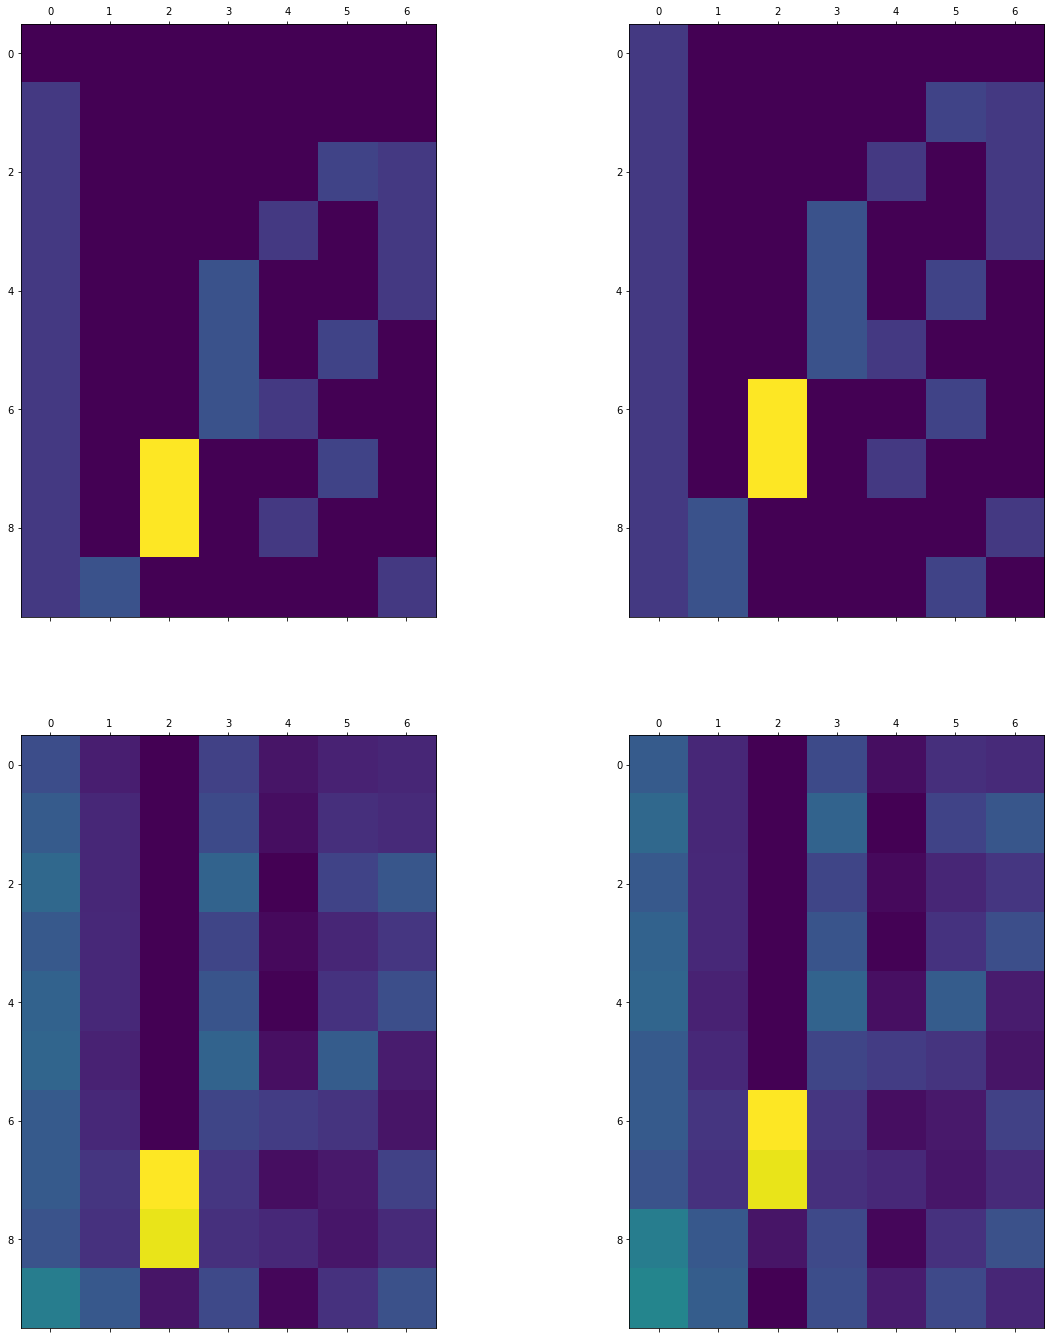

In [4]:
f, a = plt.subplots(2,2, figsize=(20, 24))

for i in range(2):
    a[0][i].matshow(test1[i:i+10])
    a[1][i].matshow(encoder_decoder1st[i:i+10])
f.show()

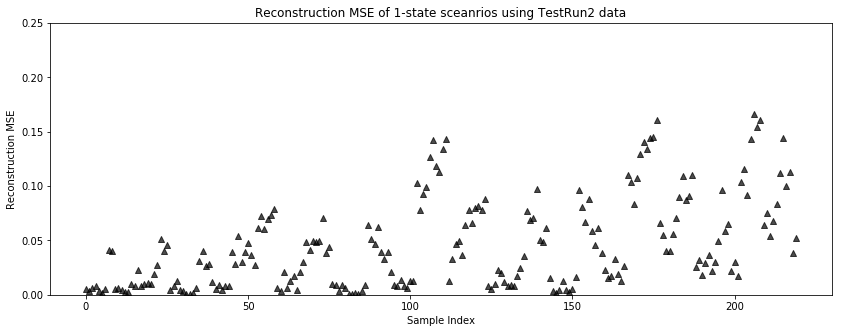

In [91]:
import pandas as pd


plt.figure(figsize=(14, 5))

mse_df = pd.DataFrame(error_mse_1st)
temp = mse_df.mean(1)
plt.scatter(temp.index, temp, alpha = 0.7, marker = '^', c= 'black')
plt.title('Reconstruction MSE of 1-state sceanrios using TestRun2 data')
plt.ylabel('Reconstruction MSE'); plt.xlabel('Sample Index')
plt.ylim(0,0.25)
plt.show()

In [96]:
temp.sort_values().iloc()[189]


0.09682928021678171

In [49]:
print('the average Mean Square Error for 1 state Scenario test data is:',error1st)

the average Mean Square Error for 1 state Scenario test data is: 0.042868853112406076


# 2 state scenario

In [8]:
tf.reset_default_graph()
with tf.Session() as sess2:
    model_2st = tf.train.import_meta_graph('../Masterarbeit/model_2st/model_2st.meta')
    model_2st.restore(sess2, '../Masterarbeit/model_2st/model_2st')
    y_pred = tf.get_collection('pred_network')[0]
    X = tf.get_collection('AE_input')[0]

    encoder_decoder2st = sess2.run(y_pred, feed_dict={X: test2})
    error2st = sess2.run(tf.reduce_mean(tf.pow(test2 - encoder_decoder2st,2)))
    error_mse_2st = sess2.run((tf.pow(test2 - encoder_decoder2st,2)))
    sess2.close()

INFO:tensorflow:Restoring parameters from ../Masterarbeit/model_2st/model_2st


In [9]:
summary_writer = tf.summary.FileWriter('./log/', sess2.graph)

## Visualization and compare for the 20 random data

0.021957284266346775
0.021957284266346775


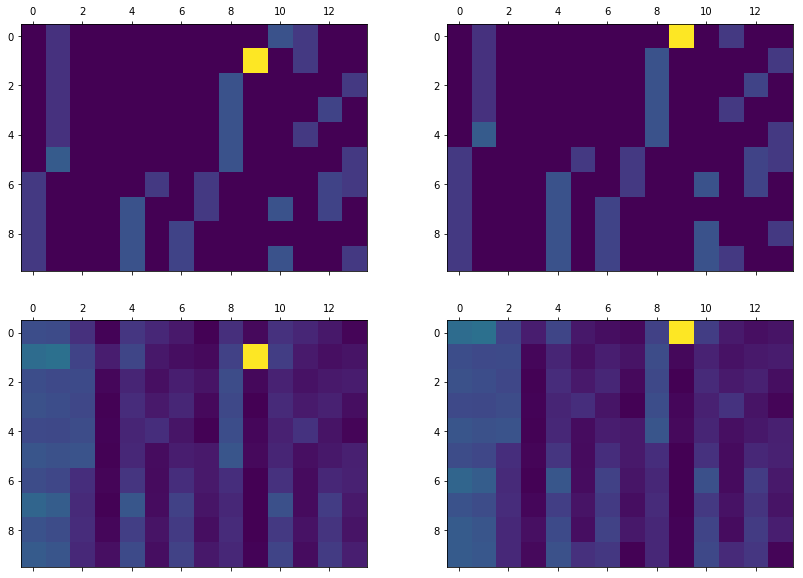

In [83]:
f, a = plt.subplots(2,2, figsize=(14, 10))
for i in range(2):
    print(error2st)
    a[0][i].matshow(test2[i:i+10])
    a[1][i].matshow(encoder_decoder2st[i:i+10])
f.show()

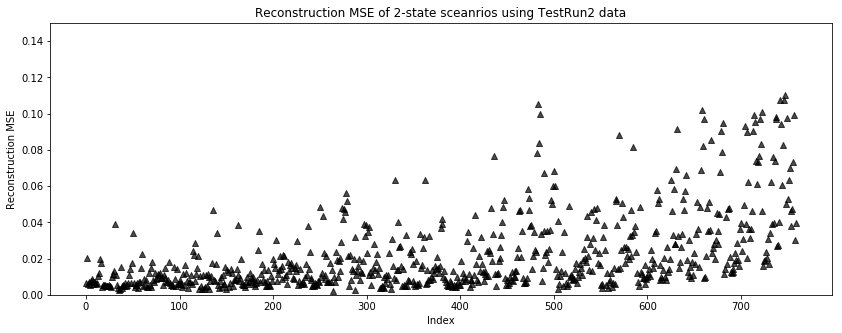

In [84]:
import pandas as pd


plt.figure(figsize=(14, 5))

mse_df = pd.DataFrame(error_mse_2st)
temp = mse_df.mean(1)
plt.scatter(temp.index, temp, alpha = 0.7, marker = '^', c= 'black')
plt.title('Reconstruction MSE of 2-state sceanrios using TestRun2 data')
plt.ylabel('Reconstruction MSE'); plt.xlabel('Index')
plt.ylim(0,0.15)
plt.show()

In [88]:
temp.sort_values().iloc()[679]

0.048371459478853754

In [35]:
print('the average Mean Square Error for 2 state Scenario test data is:',error2st)

the average Mean Square Error for 2 state Scenario test data is: 0.022017140141498432


# 3 state scenario

In [10]:
tf.reset_default_graph()
with tf.Session() as sess3:
    model_3st = tf.train.import_meta_graph('../Masterarbeit/model_3st/model_3st.meta')
    model_3st.restore(sess3, '../Masterarbeit/model_3st/model_3st')
    y_pred = tf.get_collection('pred_network')[0]
    X = tf.get_collection('AE_input')[0]
    
    encoder_decoder3st = sess3.run(y_pred, feed_dict={X: test3})
    error3st = sess3.run(tf.reduce_mean(tf.pow(test3 - encoder_decoder3st,2)))
    error_mse_3st = sess3.run(tf.pow(test3 - encoder_decoder3st,3))

INFO:tensorflow:Restoring parameters from ../Masterarbeit/model_3st/model_3st


In [11]:
summary_writer = tf.summary.FileWriter('./log/', sess3.graph)

## Visualization and compare for the 20 random data

c:\users\alienware\anaconda3\envs\itiv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


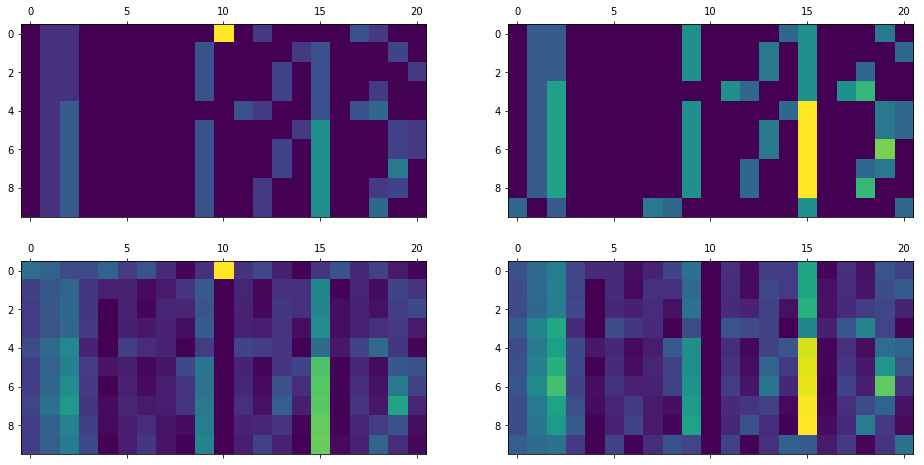

In [59]:
f, a = plt.subplots(2,2, figsize=(16, 8))
for i in range(2):
    
    a[0][i].matshow(test3[i:i+10])
    a[1][i].matshow(encoder_decoder3st[i:i+10])
f.show()

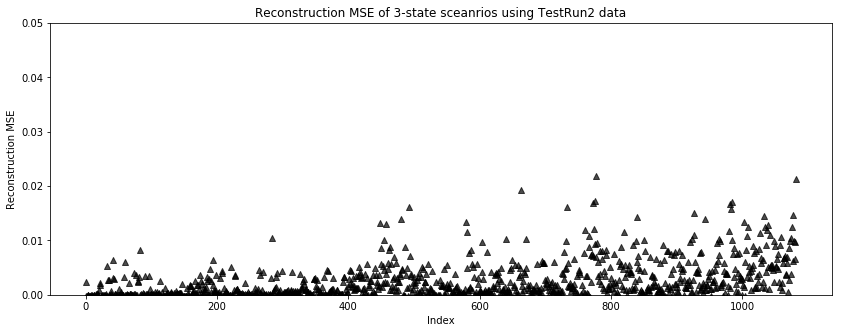

In [60]:
import pandas as pd


plt.figure(figsize=(14, 5))

mse_df = pd.DataFrame(error_mse_3st)
temp = mse_df.mean(1)
plt.scatter(temp.index, temp, alpha = 0.7, marker = '^', c= 'black')
plt.title('Reconstruction MSE of 3-state sceanrios using TestRun2 data')
plt.ylabel('Reconstruction MSE'); plt.xlabel('Index')
plt.ylim(0,0.05)
plt.show()

In [73]:
temp.sort_values().iloc()[955]

0.0061463778475184805

In [55]:
print('the average Mean Square Error for 3 state Scenario test data is:',error3st)

the average Mean Square Error for 3 state Scenario test data is: 0.01305025094322926


# 4 state scenario

In [74]:
tf.reset_default_graph()
with tf.Session() as sess4:
    model_1st = tf.train.import_meta_graph('../Masterarbeit/model_4st/model_4st.meta')
    model_1st.restore(sess4, '../Masterarbeit/model_4st/model_4st')
    y_pred = tf.get_collection('pred_network')[0]
    X = tf.get_collection('AE_input')[0]
    encoder_decoder4st = sess4.run(y_pred, feed_dict={X: test4})
    error4st = sess4.run(tf.reduce_mean(tf.pow(test4 - encoder_decoder4st,2)))
    error_mse_4st = sess4.run(tf.pow(test4 - encoder_decoder4st,4))

INFO:tensorflow:Restoring parameters from ../Masterarbeit/model_4st/model_4st


## Visualization and compare for the 20 random data

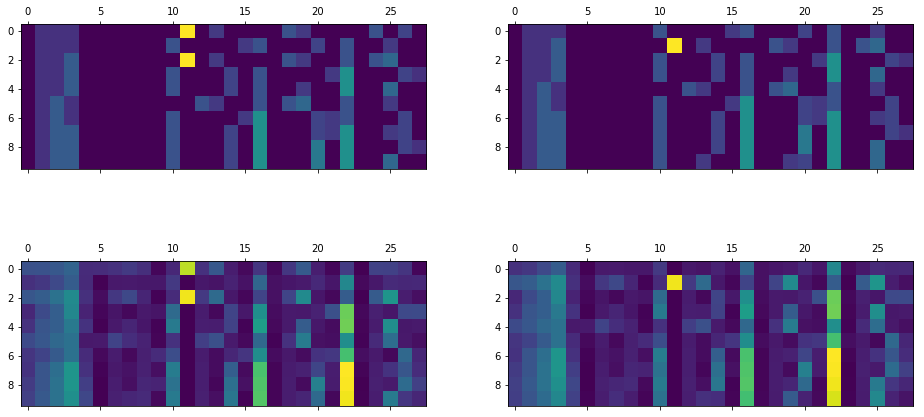

In [75]:
f, a = plt.subplots(2,2, figsize=(16, 8))
for i in range(2):
    a[0][i].matshow(test4[i:i+10])
    a[1][i].matshow(encoder_decoder4st[i:i+10])
f.show()

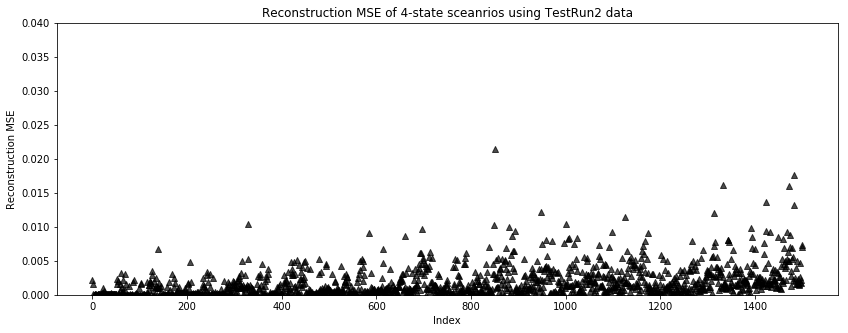

In [76]:
import pandas as pd


plt.figure(figsize=(14, 5))

mse_df = pd.DataFrame(error_mse_4st)
temp = mse_df.mean(1)
plt.scatter(temp.index, temp, alpha = 0.7, marker = '^', c= 'black')
plt.title('Reconstruction MSE of 4-state sceanrios using TestRun2 data')
plt.ylabel('Reconstruction MSE'); plt.xlabel('Index')
plt.ylim(0,0.04)
plt.show()

In [81]:
temp.sort_values().iloc()[1350]

0.004471181199771377

In [52]:
print('the average Mean Square Error for 4 state Scenario test data is:',error4st)

the average Mean Square Error for 4 state Scenario test data is: 0.015889462836788684
